# 02 Производство сетей
### UKRAINE_POLITICAL_CONDITIONS--REPORTS	
Производство сетей на основе манипуляции с общей таблицей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure

## 1. Читаем общую таблицу по голосованиям с диска

In [2]:
votes_table_com = pd.read_csv('votes_table.csv')
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
5,2022-11-30,A/RES/77/22,Committee on the Exercise of the Inalienable R...,https://digitallibrary.un.org/record/3996096,"['Palestine, Israel', 'war']",PALESTINE QUESTION
6,2022-11-30,A/RES/77/23,Division for Palestinian Rights of the Secreta...,https://digitallibrary.un.org/record/3996095,"['Palestine, Israel', 'war']",PALESTINE QUESTION
7,2022-11-30,A/RES/77/25,Peaceful settlement of the question of Palesti...,https://digitallibrary.un.org/record/3996093,"['Palestine, Israel', 'war']",PALESTINE QUESTION
8,2022-11-30,A/RES/77/24,Special information programme on the question ...,https://digitallibrary.un.org/record/3996092,"['Palestine, Israel', 'war']",PALESTINE QUESTION
9,2022-12-15,A/RES/77/228,Situation of human rights in the Islamic Repub...,https://digitallibrary.un.org/record/3997720,['Iran'],HUMAN RIGHTS--REPORTS


## 2. Data processing

In [4]:
#votes_table_com['Tags'] = list(votes_table_com['Tags'].apply(lambda x: x[1:-1]))
#votes_table_com

In [5]:
#votes_table_com.to_csv('votes_table.csv', index=False) 
#votes_table_com.drop([9], inplace=True)

In [3]:
#topic = 'PALESTINE QUESTION'
#topic = 'HUMAN RIGHTS--REPORTS'
topic = 'UKRAINE--POLITICAL CONDITIONS'
votes_table_com = votes_table_com[votes_table_com['Topic'] == topic]

In [4]:
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
12,2023-02-23,A/RES/ES-11/6,Principles of the Charter of the United Nation...,https://digitallibrary.un.org/record/4003921,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS


In [8]:
votes_table_com = votes_table_com.sort_values(
    by=['Data']
)
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
12,2023-02-23,A/RES/ES-11/6,Principles of the Charter of the United Nation...,https://digitallibrary.un.org/record/4003921,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS


## 3. Net making

###  3.1 Создание сводной таблицамы голосований

In [9]:
vote_array = [] # массив из таблиц голосований, полученных из файлов

votes_table_com['Resolution'].apply(
    lambda x: vote_array.append(
        pd.read_csv('resolution_vote/' + x.replace('/', '_') + '.csv', index_col = 'Country')
    )
)

4     None
3     None
2     None
1     None
0     None
12    None
Name: Resolution, dtype: object

In [10]:
len(vote_array)

6

In [ ]:
11n1

In [18]:
vote_array[0]

,A/RES/ES-11/1
Country,
AFGHANISTAN,1.0
ALBANIA,1.0
ALGERIA,0.0
ANDORRA,1.0
ANGOLA,0.0
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN
VIET NAM,0.0
YEMEN,1.0


In [23]:
# Merge table

common_table = vote_array[0]

for index in range(1, len(vote_array)):
    common_table = pd.merge(common_table, vote_array[index], how='outer', left_index=True, right_index=True) 

In [24]:
common_table

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0,1.0
ALBANIA,1.0,1.0,1.0,1.0,1.0,1.0
ALGERIA,0.0,0.0,-1.0,0.0,0.0,0.0
ANDORRA,1.0,1.0,1.0,1.0,1.0,1.0
ANGOLA,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN,NaN
VIET NAM,0.0,0.0,-1.0,0.0,0.0,0.0
YEMEN,1.0,1.0,0.0,1.0,0.0,1.0


####  Убираем строчки со всеми NaN

In [10]:
#common_table.dropna(how='all', inplace = True, axis=0)

In [11]:
#common_table.dropna(inplace = True)

In [12]:
common_table

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
ALBANIA,1.0,1.0,1.0,1.0,1.0
ALGERIA,0.0,0.0,-1.0,0.0,0.0
ANDORRA,1.0,1.0,1.0,1.0,1.0
ANGOLA,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
VIET NAM,0.0,0.0,-1.0,0.0,0.0
YEMEN,0.0,1.0,0.0,1.0,1.0


In [25]:
# назодим лигнюю страну
set(common_table.index).difference(vote_array[0].index)

{"COTE D'IVOIRE", 'TURKIYE', 'TÜRKIYE'}

In [14]:
len(common_table.index)

196

In [14]:
#if 'UKRAINE' in common_table.index: print('True') 


### 3.2 Убираем разное написание Турции и "CÔTE D'IVOIRE"

In [32]:
common_table.loc[['TURKEY']]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
TURKEY,1.0,1.0,1.0,NaN,NaN,NaN


In [33]:
common_table.loc[['TURKIYE']]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
TURKIYE,NaN,NaN,NaN,NaN,1.0,1.0


In [28]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
TÜRKIYE,NaN,NaN,NaN,1.0,NaN,NaN


In [29]:
common_table[common_table.index == "CÔTE D'IVOIRE"]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
CÔTE D'IVOIRE,1.0,1.0,1.0,1.0,NaN,NaN


In [30]:
common_table[common_table.index == "COTE D'IVOIRE"]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
COTE D'IVOIRE,NaN,NaN,NaN,NaN,1.0,1.0


In [15]:
#list(common_table[(common_table.index == 'TURKEY') + (common_table.index == 'TURKIYE') + (common_table.index == 'TÜRKIYE')].sum())

In [34]:
common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
TURKEY,1.0,1.0,1.0,NaN,NaN,NaN
TURKIYE,NaN,NaN,NaN,NaN,1.0,1.0
TÜRKIYE,NaN,NaN,NaN,1.0,NaN,NaN


In [35]:
common_table.loc['TÜRKIYE'] = common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)].sum()
common_table.drop(["TURKEY", 'TURKIYE'], inplace = True)

In [36]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
TÜRKIYE,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
common_table.loc["CÔTE D'IVOIRE"] = common_table.loc[["CÔTE D'IVOIRE", "COTE D'IVOIRE"], list(common_table.columns)].sum()
common_table.drop(["COTE D'IVOIRE"], inplace = True)

common_table[common_table.index == "CÔTE D'IVOIRE"]
#common_table[["CÔTE D'IVOIRE"]]

,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
Country,,,,,,
CÔTE D'IVOIRE,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
common_table.to_csv(topic + '_vote_table_2023.csv', index=True) 

###  3.2 Вычисление показателя солидарности для каждого голосования

In [39]:
# принимает таблицу с рещультатами голосования common_table
# возвращает два массива c парной узлов (ребром)

def get_edges(table):
    nodes_1 = []
    nodes_2 = []
    count_index = len(common_table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):

            nodes_1.append(table.index[index_first])
            nodes_2.append(table.index[index_second])
        
    return [nodes_1, nodes_2]

In [40]:
# принимает таблицу с результатами голосования из common_table и название расчетного столбца голосования 
# возвращает массив оценки солидарности шголосования solid_val

def get_solid_val(table, item):
    solid_val = []
    count_index = len(table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):
            
            # сравнение индексов голосования
            if (pd.isnull(table.iloc[index_first][item]) or pd.isnull(table.iloc[index_second][item])): 
                solid_val.append(np.nan) 
            else: 
                # Это значит, что если оба воздержались, то 0 == 0 это True
                solid_val.append(table.iloc[index_first][item] == table.iloc[index_second][item])
                # Нужно ли давать 1 если 1 == 1, -1 если -1 == -1... как быть с 0?
            
    return solid_val

In [41]:
#
# ЗАГРУЗНЫЙ ПРЦЕСС !!!!!
#
# создаем таблицу ребер сети

net_table = pd.DataFrame()

# создаем все ребра сети
nodes_arr = get_edges(common_table)
net_table['Nodes_1'] = nodes_arr[0]
net_table['Nodes_2'] = nodes_arr[1]

# заполняем результаты голосований
for item in common_table.columns: 
    net_table[item] = get_solid_val(common_table, item)

net_table

,Nodes_1,Nodes_2,A/RES/ES-11/1,A/RES/ES-11/2,A/RES/ES-11/3,A/RES/ES-11/4,A/RES/ES-11/5,A/RES/ES-11/6
0,AFGHANISTAN,ALBANIA,True,True,NaN,True,True,True
1,AFGHANISTAN,ALGERIA,False,False,NaN,False,False,False
2,AFGHANISTAN,ANDORRA,True,True,NaN,True,True,True
3,AFGHANISTAN,ANGOLA,False,False,NaN,True,False,False
4,AFGHANISTAN,ANTIGUA AND BARBUDA,True,True,NaN,True,False,True
...,...,...,...,...,...,...,...,...
18523,VIET NAM,ZAMBIA,False,False,NaN,False,False,False
18524,VIET NAM,ZIMBABWE,True,True,True,True,False,True
18525,YEMEN,ZAMBIA,True,True,NaN,True,False,True
18526,YEMEN,ZIMBABWE,False,False,False,False,False,False


In [44]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table[((net_table['Nodes_1'] == 'THAILAND') & (net_table['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]

#RUSSIAN FEDERATION


### 3.3 Вычисление коэффициента солидарности (веса) для каждого из ребер

`Solid_val` коэффициент солидарности (вес ребер)

In [42]:
#net_table_weight = net_table.replace({True: 1, False: -1})
net_table_weight = net_table.replace({True: 1, False: 0})

#net_table_weight = net_table

net_table_weight['Solid_val'] = abs(net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1))
#net_table_weight['Solid_val'] = net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1)


net_table_weight.drop(list(net_table_weight.columns)[2:-1], inplace=True, axis=1)

#net_table_weight = net_table_weight[net_table_weight.Solid_val != 0]
# выбираем все значения больще n
net_table_weight = net_table_weight[net_table_weight.Solid_val >=1]

net_table_weight

,Nodes_1,Nodes_2,Solid_val
0,AFGHANISTAN,ALBANIA,5.0
2,AFGHANISTAN,ANDORRA,5.0
3,AFGHANISTAN,ANGOLA,1.0
4,AFGHANISTAN,ANTIGUA AND BARBUDA,4.0
5,AFGHANISTAN,ARGENTINA,5.0
...,...,...,...
18515,VANUATU,YEMEN,5.0
18516,VANUATU,ZAMBIA,5.0
18522,VIET NAM,YEMEN,1.0
18524,VIET NAM,ZIMBABWE,5.0


In [266]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table_weight[((net_table_weight['Nodes_1'] == 'AFGHANISTAN') & (net_table_weight['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]


####  Немного статистики

In [43]:
set(net_table_weight['Solid_val'].isna())

{False}

In [44]:
len(net_table_weight)

13352

In [46]:
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 5])

In [45]:
len(net_table_weight['Solid_val'])
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 0])

13352

(array([1329.,    0.,    0., 1134.,    0.,    0.,    0., 1411.,    0.,
           0., 3139.,    0.,    0.,    0., 3060.,    0.,    0., 3279.]),
 array([1.        , 1.27777778, 1.55555556, 1.83333333, 2.11111111,
        2.38888889, 2.66666667, 2.94444444, 3.22222222, 3.5       ,
        3.77777778, 4.05555556, 4.33333333, 4.61111111, 4.88888889,
        5.16666667, 5.44444444, 5.72222222, 6.        ]),
 <BarContainer object of 18 artists>)

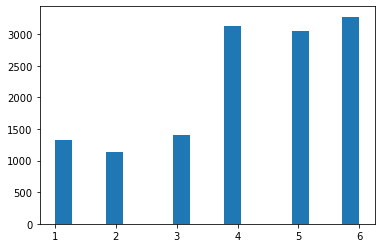

In [46]:
plt.hist(net_table_weight['Solid_val'], bins=18)

### 3.3 Строим сеть 

In [47]:
G = nx.Graph()
G.add_nodes_from(list(common_table.index))
net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

0        None
2        None
3        None
4        None
5        None
         ... 
18515    None
18516    None
18522    None
18524    None
18525    None
Length: 13352, dtype: object

In [48]:
len(G.nodes())

193

In [167]:
G.edges()

EdgeView([('AFGHANISTAN', 'ALBANIA'), ('AFGHANISTAN', 'ANDORRA'), ('AFGHANISTAN', 'ANGOLA'), ('AFGHANISTAN', 'ANTIGUA AND BARBUDA'), ('AFGHANISTAN', 'ARGENTINA'), ('AFGHANISTAN', 'AUSTRALIA'), ('AFGHANISTAN', 'AUSTRIA'), ('AFGHANISTAN', 'BAHAMAS'), ('AFGHANISTAN', 'BAHRAIN'), ('AFGHANISTAN', 'BANGLADESH'), ('AFGHANISTAN', 'BARBADOS'), ('AFGHANISTAN', 'BELGIUM'), ('AFGHANISTAN', 'BELIZE'), ('AFGHANISTAN', 'BENIN'), ('AFGHANISTAN', 'BHUTAN'), ('AFGHANISTAN', 'BOSNIA AND HERZEGOVINA'), ('AFGHANISTAN', 'BOTSWANA'), ('AFGHANISTAN', 'BRAZIL'), ('AFGHANISTAN', 'BRUNEI DARUSSALAM'), ('AFGHANISTAN', 'BULGARIA'), ('AFGHANISTAN', 'CABO VERDE'), ('AFGHANISTAN', 'CAMBODIA'), ('AFGHANISTAN', 'CANADA'), ('AFGHANISTAN', 'CHAD'), ('AFGHANISTAN', 'CHILE'), ('AFGHANISTAN', 'COLOMBIA'), ('AFGHANISTAN', 'COMOROS'), ('AFGHANISTAN', 'COSTA RICA'), ('AFGHANISTAN', 'CROATIA'), ('AFGHANISTAN', 'CYPRUS'), ('AFGHANISTAN', 'CZECHIA'), ('AFGHANISTAN', "CÔTE D'IVOIRE"), ('AFGHANISTAN', 'DEMOCRATIC REPUBLIC OF THE CO

In [49]:
nx.is_connected(G)

False

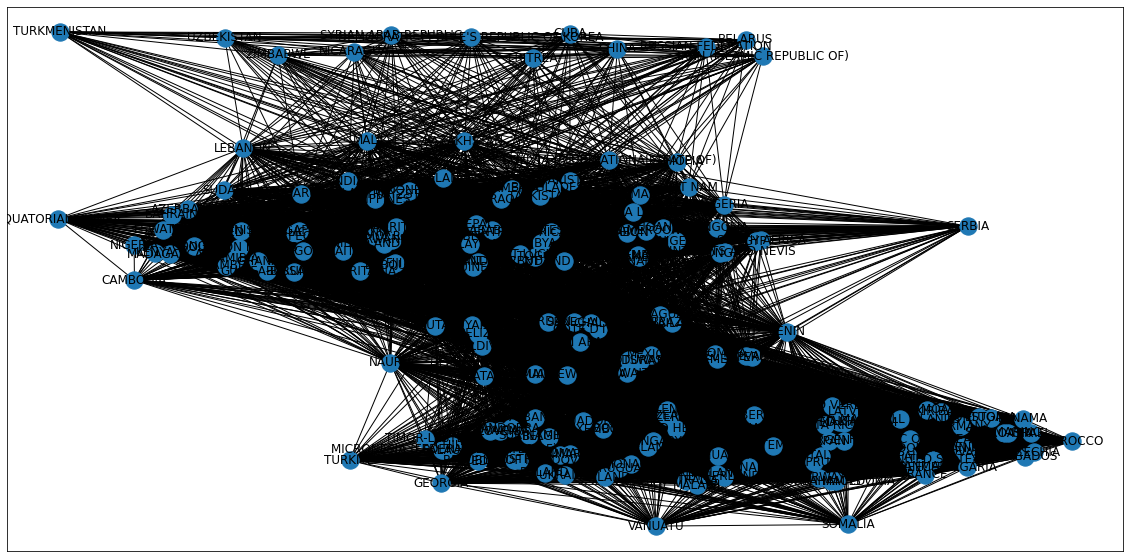

In [61]:
figure(figsize=(20, 10))
nx.draw_networkx(G)

In [62]:
print(len(sorted(nx.connected_components(G))))
print(len(G.nodes()))

1
183


In [41]:
print(round(nx.average_clustering(G), 2))
print(round(nx.transitivity(G), 2))

0.99
1.0


In [42]:
#country_name = 'TURKIYE'
country_name = 'RUSSIAN FEDERATION'
#country_name = 'UNITED STATES'
#country_name = 'ISRAEL'
#UNITED STATES OF AMERICA

for index in range (0, len(list(nx.connected_components(G)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(G))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(G))[index]
    print(country_arr_test)
    print('______________')





0
False

{'SPAIN', 'ROMANIA', 'LUXEMBOURG', 'LATVIA', 'CZECHIA', 'PALAU', 'SAMOA', 'AUSTRALIA', 'FRANCE', 'SWEDEN', 'TIMOR-LESTE', 'MALTA', 'COSTA RICA', 'LITHUANIA', 'GREECE', 'IRELAND', 'NEW ZEALAND', 'UNITED KINGDOM', 'SLOVENIA', 'LIBERIA', 'UNITED STATES', 'ITALY', 'SAN MARINO', 'URUGUAY', 'MONTENEGRO', 'BOSNIA AND HERZEGOVINA', 'NETHERLANDS', 'POLAND', 'CABO VERDE', 'ICELAND', 'FINLAND', 'ECUADOR', 'CROATIA', 'CYPRUS', 'LIECHTENSTEIN', 'MALAWI', 'TUVALU', 'REPUBLIC OF KOREA', 'UKRAINE', 'PORTUGAL', 'BULGARIA', 'BAHAMAS', 'NORWAY', 'SWITZERLAND', 'BARBADOS', 'REPUBLIC OF MOLDOVA', 'DENMARK', 'GERMANY', 'HUNGARY', 'JAPAN', 'ISRAEL', 'NORTH MACEDONIA', 'ALBANIA', 'ANDORRA', 'DOMINICAN REPUBLIC', 'AUSTRIA', 'ESTONIA', 'GUATEMALA', 'BELGIUM', 'MICRONESIA (FEDERATED STATES OF)', 'PANAMA', 'MONACO', 'KIRIBATI', 'MYANMAR', 'MARSHALL ISLANDS', 'ARGENTINA', 'SLOVAKIA', 'CANADA', 'SURINAME', 'CHILE'}
______________

1
False

{'LIBYA', 'KENYA', 'HAITI', 'SAINT KITTS AND NEVIS', 'UNITED REPUB

### 3.4  Профили голосования по теме:

In [297]:
# Ищем по первой букве
#common_table[common_table.index == 'AZERBAIJAN']
#common_table[common_table.index == 'TURKMENISTAN']
#common_table[common_table.index == 'VENEZUELA (BOLIVARIAN REPUBLIC OF)']
common_table[common_table.index == 'BURKINA FASO']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
BURKINA FASO,NaN,NaN,NaN,NaN,NaN


In [84]:
common_table[common_table.index == 'CAMEROON']

,A/RES/77/228,A/RES/77/229,A/RES/77/230
Country,,,
CAMEROON,0.0,0.0,0.0


In [77]:
common_table[common_table.index == 'NEPAL']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
NEPAL,0.0,1.0,0.0,1.0,1.0


In [111]:
common_table[common_table.index == 'RUSSIAN FEDERATION']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
RUSSIAN FEDERATION,-1.0,-1.0,-1.0,-1.0,-1.0


In [1430]:
net_table[((net_table['Nodes_1'] == 'LESOTHO') & (net_table['Nodes_2'] == 'THAILAND'))]

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
14042,LESOTHO,THAILAND,True,True,True,True,True


In [1432]:
net_table[net_table['Nodes_1'] == 'LESOTHO']

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
13968,LESOTHO,LIBERIA,False,False,False,True,True
13969,LESOTHO,LIBYA,True,False,False,True,True
13970,LESOTHO,LIECHTENSTEIN,False,False,False,True,True
13971,LESOTHO,LITHUANIA,False,False,False,True,True
13972,LESOTHO,LUXEMBOURG,False,False,False,True,True
...,...,...,...,...,...,...,...
14060,LESOTHO,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
14061,LESOTHO,VIET NAM,True,True,False,False,False
14062,LESOTHO,YEMEN,True,False,True,True,True
14063,LESOTHO,ZAMBIA,False,False,NaN,True,True


### 3.5 Строим сеть с разными весами

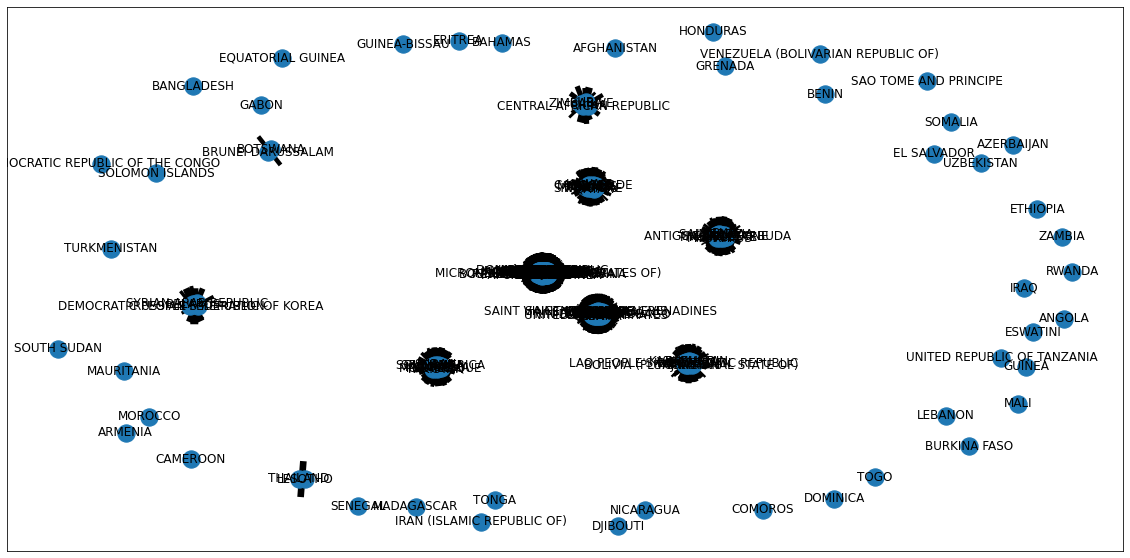

In [50]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 6
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [51]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

54
193


#### Связи -- единогласное голосования по всем резолюциям:

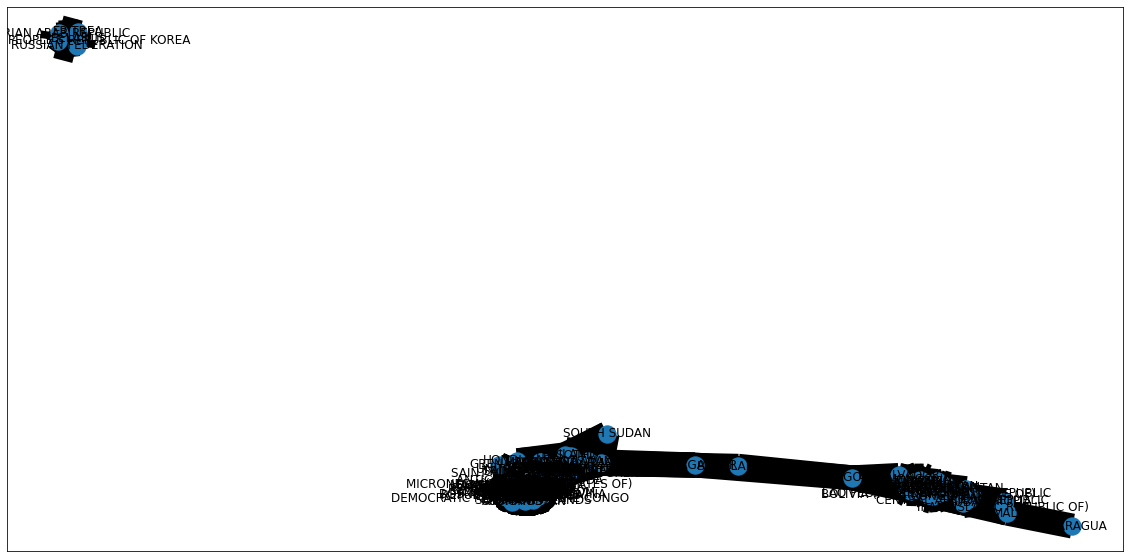

In [52]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 5
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F5 = nx.Graph() 
F5.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F5, seed=0)

for edge in F5.edges(data='weight'):
    nx.draw_networkx_edges(F5, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F5, pos) 

In [53]:
print(len(sorted(nx.connected_components(F5))))
print(len(F5.nodes()))

2
174


In [274]:
print(list(nx.connected_components(F))[1])

{'MALTA', 'SAMOA', 'CROATIA', 'CZECHIA', 'LIECHTENSTEIN', 'MICRONESIA (FEDERATED STATES OF)', 'NETHERLANDS', 'PORTUGAL', 'CHILE', 'ARGENTINA', 'FINLAND', 'PAPUA NEW GUINEA', 'SWEDEN', 'COLOMBIA', 'ROMANIA', 'URUGUAY', 'PHILIPPINES', 'BELGIUM', 'NEW ZEALAND', 'NAURU', 'CYPRUS', 'BULGARIA', 'SAN MARINO', 'PANAMA', 'PERU', 'SWITZERLAND', 'MALAWI', 'LIBERIA', 'UNITED STATES', 'GUATEMALA', 'COSTA RICA', 'MONACO', 'SEYCHELLES', 'ECUADOR', 'ESTONIA', 'PALAU', 'LITHUANIA', 'MONTENEGRO', 'AUSTRALIA', 'MARSHALL ISLANDS', 'ICELAND', 'DENMARK', 'FIJI', 'GERMANY', 'HUNGARY', 'GEORGIA', 'KIRIBATI', 'MYANMAR', 'TUVALU', 'ITALY', 'POLAND', 'UNITED KINGDOM', 'CHAD', 'NORWAY', 'UKRAINE', 'SLOVENIA', 'LATVIA', 'REPUBLIC OF MOLDOVA', 'AUSTRIA', 'ANDORRA', 'IRELAND', 'GREECE', 'DOMINICAN REPUBLIC', 'CANADA', 'NORTH MACEDONIA', 'JAPAN', 'PARAGUAY', 'FRANCE', 'LUXEMBOURG', 'ALBANIA', 'REPUBLIC OF KOREA', 'SLOVAKIA', 'TURKIYE', 'BOSNIA AND HERZEGOVINA', 'SPAIN'}


In [173]:
country_name = 'IRAN (ISLAMIC REPUBLIC OF)'
country_name = 'HUNGARY'

for index in range (0, len(list(nx.connected_components(F5)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F5))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F5))[index]
    print(country_arr_test)
    print('______________')


0
True

{'SPAIN', 'ROMANIA', 'COLOMBIA', 'LUXEMBOURG', 'TÜRKIYE', 'LATVIA', 'PAPUA NEW GUINEA', 'CZECHIA', 'PALAU', 'SAMOA', 'AUSTRALIA', 'FRANCE', 'SWEDEN', 'NAURU', 'MALTA', 'COSTA RICA', 'LITHUANIA', 'GREECE', 'IRELAND', 'NEW ZEALAND', 'UNITED KINGDOM', 'SLOVENIA', 'LIBERIA', 'PARAGUAY', 'UNITED STATES', 'ITALY', 'GEORGIA', 'SAN MARINO', 'URUGUAY', 'MONTENEGRO', 'BOSNIA AND HERZEGOVINA', 'PHILIPPINES', 'NETHERLANDS', 'POLAND', 'ICELAND', 'FINLAND', 'ECUADOR', 'CROATIA', 'CYPRUS', 'LIECHTENSTEIN', 'MALAWI', 'TUVALU', 'REPUBLIC OF KOREA', 'UKRAINE', 'SEYCHELLES', 'PORTUGAL', 'BULGARIA', 'NORWAY', 'CHAD', 'SWITZERLAND', 'REPUBLIC OF MOLDOVA', 'DENMARK', 'FIJI', 'GERMANY', 'HUNGARY', "CÔTE D'IVOIRE", 'JAPAN', 'NORTH MACEDONIA', 'ALBANIA', 'ANDORRA', 'DOMINICAN REPUBLIC', 'AUSTRIA', 'ESTONIA', 'GUATEMALA', 'BELGIUM', 'MICRONESIA (FEDERATED STATES OF)', 'PANAMA', 'MONACO', 'PERU', 'MYANMAR', 'MARSHALL ISLANDS', 'ARGENTINA', 'SLOVAKIA', 'CANADA', 'KIRIBATI', 'CHILE'}
______________

1
Fal

#### Связи -- единогласное голосования по всем резолюциям + те, кто один раз воздержался

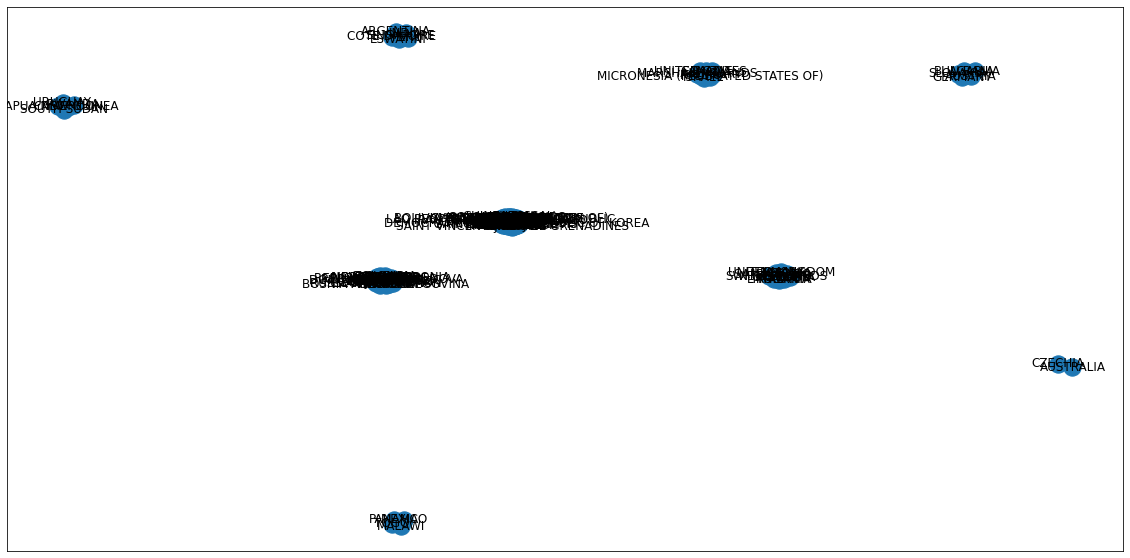

In [301]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 4
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F45 = nx.Graph() 
F45.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F45, seed=0)

for edge in F45.edges(data='weight'):
    nx.draw_networkx_edges(F45, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F45, pos) 

In [302]:
print(len(sorted(nx.connected_components(F45))))
print(len(F45.nodes()))

9
158


In [303]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F45)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F45))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F45))[index]
    print(country_arr_test)
    print('______________')


0
False

{'GERMANY', 'AUSTRIA', 'BULGARIA', 'SLOVAKIA', 'ALBANIA'}
______________

1
False

{'QATAR', 'SRI LANKA', 'EL SALVADOR', 'TURKMENISTAN', 'BURKINA FASO', 'NEPAL', 'SYRIAN ARAB REPUBLIC', 'TURKIYE', 'LIBYA', 'ECUADOR', 'PAKISTAN', 'MOZAMBIQUE', 'SAUDI ARABIA', 'INDONESIA', 'SAINT KITTS AND NEVIS', 'NIGERIA', 'MALI', 'MALAYSIA', 'CHAD', 'MAURITANIA', 'MALDIVES', 'ZAMBIA', 'GUINEA-BISSAU', 'BOTSWANA', 'SOUTH AFRICA', 'CYPRUS', 'AZERBAIJAN', 'COMOROS', 'GRENADA', 'GAMBIA', 'PHILIPPINES', 'ALGERIA', 'SAINT LUCIA', 'CHINA', 'YEMEN', 'BARBADOS', 'GABON', 'BENIN', 'UGANDA', 'GUINEA', 'MALTA', 'LESOTHO', 'NIGER', 'THAILAND', 'IRAN (ISLAMIC REPUBLIC OF)', 'KUWAIT', 'CUBA', 'OMAN', 'BHUTAN', 'KAZAKHSTAN', 'SUDAN', 'ZIMBABWE', 'SAINT VINCENT AND THE GRENADINES', 'UNITED ARAB EMIRATES', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'JAMAICA', 'NAMIBIA', 'CABO VERDE', 'LEBANON', 'BOLIVIA (PLURINATIONAL STATE OF)', 'SENEGAL', 'DJIBOUTI', 'EGYPT', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'MOROCCO', 'KE

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более двух раз воздержался или один раз проголосовал против

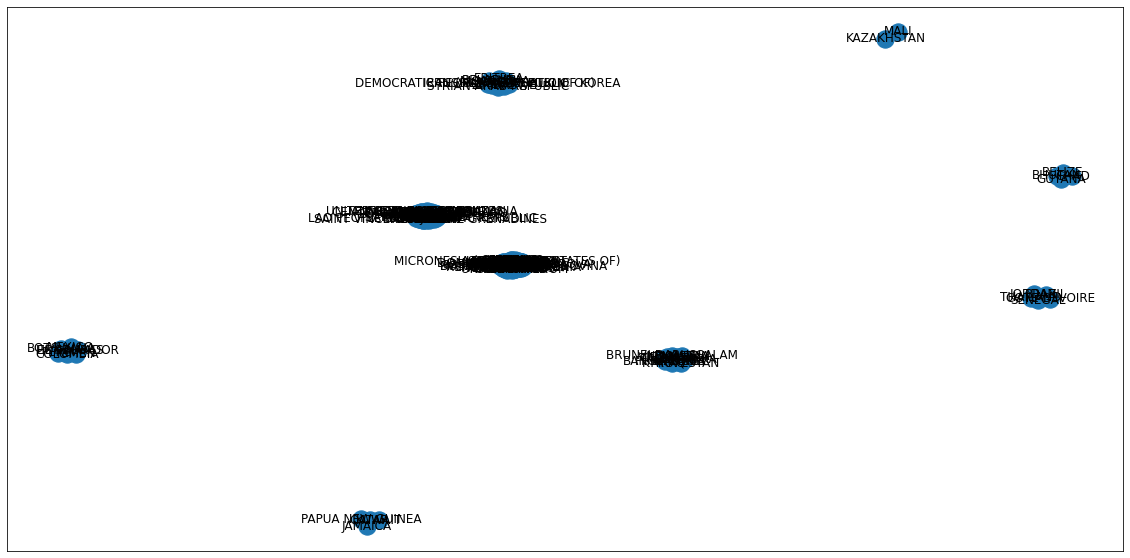

In [78]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 3
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F345 = nx.Graph() 
F345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F345, seed=0)

for edge in F345.edges(data='weight'):
    nx.draw_networkx_edges(F345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F345, pos) 

In [79]:
print(len(sorted(nx.connected_components(F345))))
print(len(F345.nodes()))

9
160


In [80]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F345)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F345))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F345))[index]
    print(country_arr_test)
    print('______________')


0
False

{'SPAIN', 'ROMANIA', 'LUXEMBOURG', 'LATVIA', 'CZECHIA', 'PALAU', 'SAMOA', 'AUSTRALIA', 'FRANCE', 'SWEDEN', 'TIMOR-LESTE', 'MALTA', 'COSTA RICA', 'LITHUANIA', 'GREECE', 'IRELAND', 'NEW ZEALAND', 'UNITED KINGDOM', 'SLOVENIA', 'LIBERIA', 'UNITED STATES', 'ITALY', 'SAN MARINO', 'URUGUAY', 'MONTENEGRO', 'BOSNIA AND HERZEGOVINA', 'NETHERLANDS', 'POLAND', 'CABO VERDE', 'ICELAND', 'FINLAND', 'ECUADOR', 'CROATIA', 'CYPRUS', 'LIECHTENSTEIN', 'MALAWI', 'TUVALU', 'REPUBLIC OF KOREA', 'UKRAINE', 'PORTUGAL', 'BULGARIA', 'BAHAMAS', 'NORWAY', 'SWITZERLAND', 'BARBADOS', 'REPUBLIC OF MOLDOVA', 'DENMARK', 'GERMANY', 'HUNGARY', 'JAPAN', 'ISRAEL', 'NORTH MACEDONIA', 'ALBANIA', 'ANDORRA', 'DOMINICAN REPUBLIC', 'AUSTRIA', 'ESTONIA', 'GUATEMALA', 'BELGIUM', 'MICRONESIA (FEDERATED STATES OF)', 'PANAMA', 'MONACO', 'KIRIBATI', 'MYANMAR', 'MARSHALL ISLANDS', 'ARGENTINA', 'SLOVAKIA', 'CANADA', 'SURINAME', 'CHILE'}
______________

1
False

{'LIBYA', 'KENYA', 'HAITI', 'SAINT KITTS AND NEVIS', 'UNITED REPUB

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более трех раз воздержался или ...

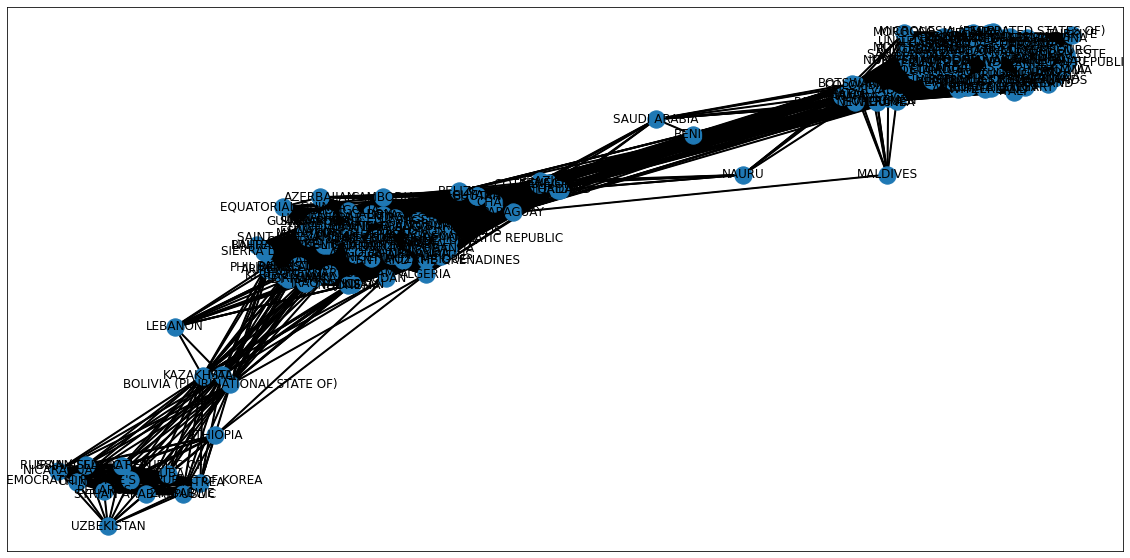

In [55]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 2
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F2345 = nx.Graph() 
F2345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F2345, seed=0)

for edge in F2345.edges(data='weight'):
    nx.draw_networkx_edges(F2345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F2345, pos) 

In [56]:
print(len(sorted(nx.connected_components(F2345))))
print(len(F2345.nodes()))

1
179


In [57]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F2345)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F2345))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F2345))[index]
    print(country_arr_test)
    print('______________')


0
True

{'CHINA', 'LATVIA', 'BAHRAIN', 'SWEDEN', 'SAMOA', 'SAINT KITTS AND NEVIS', 'UNITED KINGDOM', 'COSTA RICA', 'BRUNEI DARUSSALAM', 'JAMAICA', 'PARAGUAY', 'ITALY', 'SAN MARINO', 'MOZAMBIQUE', 'NAMIBIA', 'SINGAPORE', 'POLAND', 'LIECHTENSTEIN', 'ECUADOR', 'SUDAN', 'MADAGASCAR', 'TOGO', 'PAKISTAN', 'ESWATINI', 'SOUTH AFRICA', 'REPUBLIC OF KOREA', 'INDONESIA', 'BULGARIA', 'UGANDA', 'NORTH MACEDONIA', 'NICARAGUA', 'AUSTRIA', 'EL SALVADOR', 'MOROCCO', 'BELGIUM', 'PANAMA', 'PERU', 'BHUTAN', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'ARGENTINA', 'EQUATORIAL GUINEA', 'KIRIBATI', 'SPAIN', 'COLOMBIA', 'CAMBODIA', 'FRANCE', 'NAURU', 'GAMBIA', 'INDIA', 'LITHUANIA', 'BOTSWANA', 'GREECE', 'SAINT LUCIA', 'LIBERIA', 'CONGO', 'GUINEA', 'URUGUAY', 'MONTENEGRO', 'BURUNDI', 'AZERBAIJAN', 'TONGA', 'MALAWI', "COTE D'IVOIRE", 'OMAN', 'PORTUGAL', 'BELARUS', 'SENEGAL', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'NORWAY', 'KYRGYZSTAN', 'BARBADOS', 'NEPAL', 'CUBA', 'REPUBLIC OF MOLDOVA', 'DENMARK', 'GERMANY', 'ISRAE

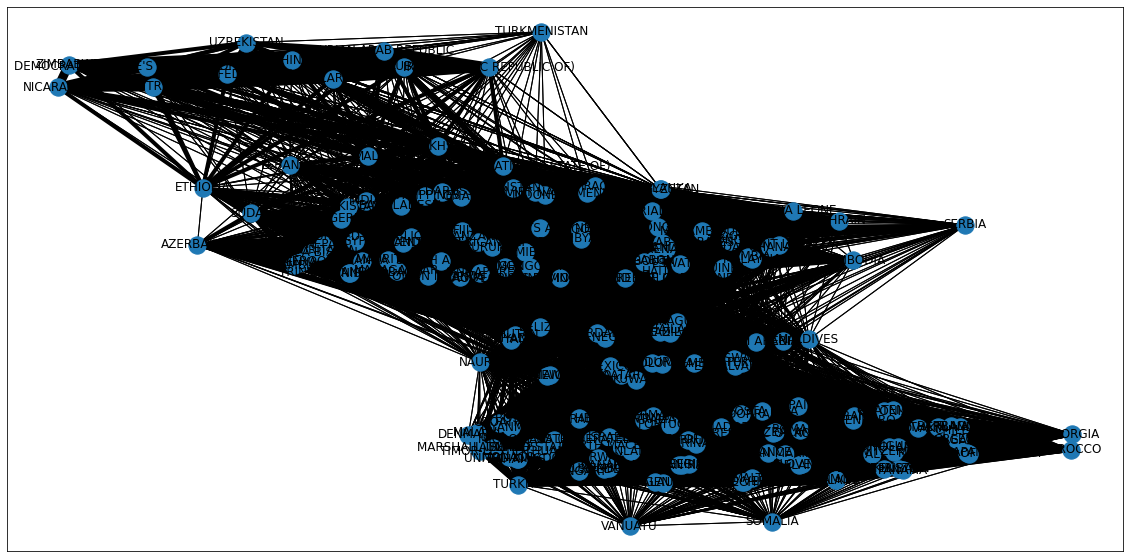

In [81]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 1
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F12345 = nx.Graph() 
F12345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F12345, seed=0)

for edge in F12345.edges(data='weight'):
    nx.draw_networkx_edges(F12345, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F12345, pos) 

In [82]:
print(len(sorted(nx.connected_components(F12345))))
print(len(F12345.nodes()))

1
183


### 5. Экспорт в Gephi

In [54]:
topic

'UKRAINE--POLITICAL CONDITIONS'

In [55]:
nx.write_gexf(G, "UN_{}_2023.gexf".format(topic.replace(' ', '_')))

### Запись названия стран

In [186]:
common_table.drop(list(common_table.columns), axis = 1).to_csv('country_table.csv', index=True) 